In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
#from vnpy.trader.app.ctaStrategy.strategy.strategyMultiTimeframe import MultiTimeframeStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyMultiSignal import MultiSignalStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [ ]:
# 使用历史数据缓存服务器，请先运行startHds.py
engine.initHdsClient()                        # 受限于机器内存，超出上限会报错

In [3]:
# 设置回测使用的数据                       
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20150101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象
#ngine.initStrategy(MultiTimeframeStrategy, d)    
#engine.initStrategy(MultiSignalStrategy, {})    

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2018-08-06 15:01:09.708000	开始载入数据
2018-08-06 15:01:28.454000	载入完成，数据量：155070
2018-08-06 15:01:28.454000	开始回测
2018-08-06 15:01:28.504000	策略初始化完成
2018-08-06 15:01:28.504000	策略启动完成
2018-08-06 15:01:28.504000	开始回放数据
2018-08-06 15:01:39.480000	数据回放结束


2018-08-06 15:02:11.279000	计算按日统计结果
2018-08-06 15:02:11.334000	------------------------------
2018-08-06 15:02:11.334000	首个交易日：	2015-01-12
2018-08-06 15:02:11.334000	最后交易日：	2017-07-14
2018-08-06 15:02:11.334000	总交易日：	612
2018-08-06 15:02:11.334000	盈利交易日	297
2018-08-06 15:02:11.334000	亏损交易日：	315
2018-08-06 15:02:11.334000	起始资金：	1000000
2018-08-06 15:02:11.334000	结束资金：	1,133,650.64
2018-08-06 15:02:11.335000	总收益率：	13.37%
2018-08-06 15:02:11.335000	年化收益：	5.24%
2018-08-06 15:02:11.335000	总盈亏：	133,650.64
2018-08-06 15:02:11.335000	最大回撤: 	-185,949.45
2018-08-06 15:02:11.335000	百分比最大回撤: -16.31%
2018-08-06 15:02:11.335000	总手续费：	148,769.36
2018-08-06 15:02:11.335000	总滑点：	267,420.0
2018-08-06 15:02:11.335000	总成交金额：	4,958,978,520.0
2018-08-06 15:02:11.335000	总成交笔数：	4,457.0
2018-08-06 15:02:11.336000	日均盈亏：	218.38
2018-08-06 15:02:11.336000	日均手续费：	243.09
2018-08-06 15:02:11.336000	日均滑点：	436.96
2018-08-06 15:02:11.336000	日均成交金额：	8,102,906.08
2018-08-06 15:02:11.336000	日均成交笔数：	7.28
2018-08-06 15:02:1

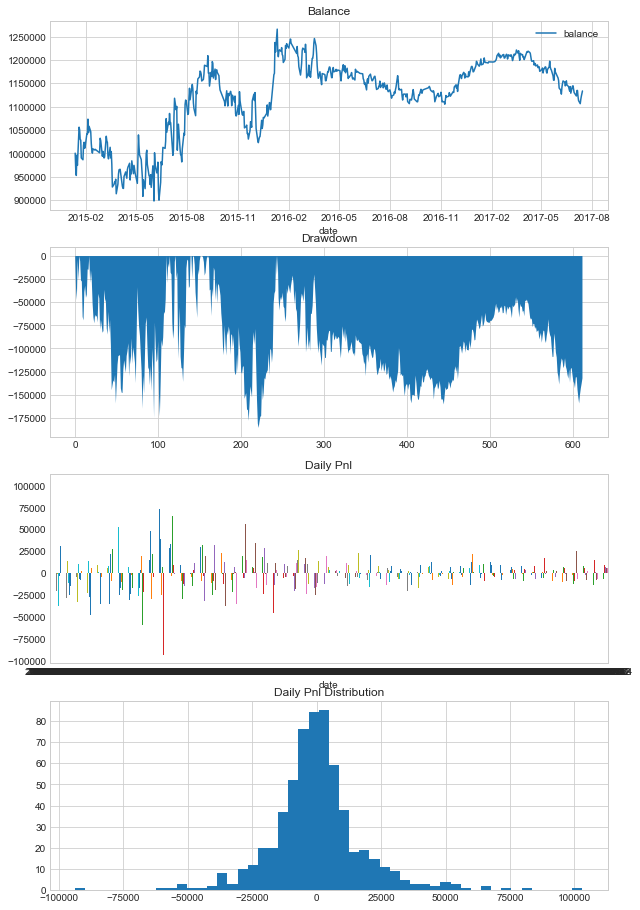

In [7]:
# 显示逐日回测结果
engine.showDailyResult()

In [ ]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [ ]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])

In [ ]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('totalNetPnl')        # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 12, 16, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
#setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
#setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
start = time.time()
#resultList = engine.runParallelOptimization(AtrRsiStrategy, setting)
resultList = engine.runOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

In [ ]:
# 显示优化的所有统计数据
for result in resultList:
    print '-' * 30
    print u'参数：%s，目标：%s' %(result[0], result[1])
    print u'统计数据：'
    for k, v in result[2].items():
        print u'%s：%s' %(k, v)